In [1]:
import time
import geopandas as gpd
import pandas as pd

In [2]:
from otp.fare_otp import call_otp_otm, return_itineraries_otm

In [3]:
import config

In [4]:
%%time

p = call_otp_otm()

#needs a bit of time before it can start working
#time.sleep(90)


java -Xmx4G -jar C:/Users/ryanm/UCLADrive/205A_Capstone/EquityTool/GitProject/Data/otp/otp-1.4.0-shaded.jar --router graphs-2021-12-28 --graphs C:/Users/ryanm/UCLADrive/205A_Capstone/EquityTool/GitProject/Data/data/San Francisco-Oakland/otp/graphs --server --enableScriptingWebService
 --analyst --pointSets C:/Users/ryanm/UCLADrive/205A_Capstone/EquityTool/GitProject/sfmta_equity/otp/pointsets ONE TO MANY
Wall time: 1min 30s


In [16]:
%%time

test = return_itineraries_otm([-122.4241777,37.76712444, '2021-12-28',8,15])

Wall time: 4.99 s


In [17]:
test

{'properties': {'id': 'null_4'},
 'data': {'jobs': {'sums': [0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    2,
    17],
   'counts': [0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,


In [7]:
#test['times']

In [8]:
hoods = gpd.read_file('From_SFMTA/hoods')

In [9]:
hoods.head()

,ID,LABEL,NEIGHBORHO,EQUITY_AFF,geometry
0,06075025600,"256 (San Francisco, CA)",Excelsior-Outer Mission,Equity Nhood,POINT (-122.42242 37.72871)
1,06075026001,"260.01 (San Francisco, CA)",Excelsior-Outer Mission,Equity Nhood,POINT (-122.43224 37.72355)
2,06075026002,"260.02 (San Francisco, CA)",Excelsior-Outer Mission,Equity Nhood,POINT (-122.42628 37.72612)
3,06075026003,"260.03 (San Francisco, CA)",Excelsior-Outer Mission,Equity Nhood,POINT (-122.42877 37.71962)
4,06075026004,"260.04 (San Francisco, CA)",Excelsior-Outer Mission,Equity Nhood,POINT (-122.43570 37.71789)


In [10]:
hoods['lon'] = hoods.geometry.x
hoods['lat'] = hoods.geometry.y

In [11]:
jobs = gpd.read_file('From_SFMTA/jobs')
tracts_min_time = pd.read_csv('From_SFMTA/tracts_min_time.csv')
tracts_min_time['ID'] = tracts_min_time.tract.astype(str).str.zfill(11)
jobs = jobs.merge(tracts_min_time, on='ID', how='left')
jobs = jobs[jobs.min_time <= 75].reset_index(drop=True)

In [12]:
jobs

,ID,LABEL,ESSENTIAL,geometry,tract,min_time
0,06001404700,"4047 (Alameda, CA)",406,POINT (-122.20699 37.81334),6.001405e+09,65.02
1,06001404800,"4048 (Alameda, CA)",302,POINT (-122.21320 37.80551),6.001405e+09,56.52
2,06001404900,"4049 (Alameda, CA)",617,POINT (-122.22151 37.80414),6.001405e+09,54.55
3,06001405000,"4050 (Alameda, CA)",393,POINT (-122.22764 37.80828),6.001405e+09,56.12
4,06001405100,"4051 (Alameda, CA)",239,POINT (-122.23224 37.81142),6.001405e+09,60.20
...,...,...,...,...,...,...
529,06081607702,"6077.02 (San Mateo, CA)",173,POINT (-122.30273 37.56496),6.081608e+09,57.15
530,06081607800,"6078 (San Mateo, CA)",497,POINT (-122.29489 37.56081),6.081608e+09,63.73
531,06081607900,"6079 (San Mateo, CA)",10856,POINT (-122.28655 37.56143),6.081608e+09,64.07
532,06081608004,"6080.04 (San Mateo, CA)",18615,POINT (-122.27248 37.56518),6.081608e+09,54.67


In [13]:
cols = jobs.ID.tolist()

In [14]:
hoods[cols] = ''

In [15]:
hoods.sample(3)

,ID,LABEL,NEIGHBORHO,EQUITY_AFF,geometry,lon,lat,06001404700,06001404800,06001404900,...,06081607300,06081607400,06081607500,06081607600,06081607701,06081607702,06081607800,06081607900,06081608004,06081608100
68,06075980501,"9805.01 (San Francisco, CA)",Visitacion Valley,Equity Nhood,POINT (-122.41871 37.71794),-122.418706,37.717937,,,,...,,,,,,,,,,
46,06075022802,"228.02 (San Francisco, CA)",Mission,Equity Nhood,POINT (-122.40623 37.75892),-122.406234,37.758915,,,,...,,,,,,,,,,
14,06075016000,"160 (San Francisco, CA)",Downtown/Civic Center,Equity Nhood,POINT (-122.42249 37.78234),-122.422491,37.782339,,,,...,,,,,,,,,,


In [16]:
hoods_test = hoods.sample(5).reset_index(drop=True)

In [17]:
%%time

times = hoods.copy()

for index, row in times.iterrows():
    ox = times.loc[index,"lon"]
    oy = times.loc[index,"lat"]
    itin = return_itineraries_otm([ox, oy, '2021-12-28',8,15])
    i = 0
    for col in cols:
        time = itin['times'][i]
        if time < 7200:
            times.loc[index, col] = round(itin['times'][i]/60,2)
        else:
            times.loc[index, col] = ""
        i = i +1



Wall time: 5min 38s


In [18]:
times

,ID,LABEL,NEIGHBORHO,EQUITY_AFF,geometry,lon,lat,06001404700,06001404800,06001404900,...,06081607300,06081607400,06081607500,06081607600,06081607701,06081607702,06081607800,06081607900,06081608004,06081608100
0,06075025600,"256 (San Francisco, CA)",Excelsior-Outer Mission,Equity Nhood,POINT (-122.42242 37.72871),-122.422424,37.728713,79.48,66.2,64.0,...,88.53,81.25,79.27,75.48,81.97,78.7,86.37,86.78,77.48,
1,06075026001,"260.01 (San Francisco, CA)",Excelsior-Outer Mission,Equity Nhood,POINT (-122.43224 37.72355),-122.432243,37.723550,,73.85,65.05,...,88.53,81.25,79.27,75.48,81.97,78.7,86.37,86.78,77.48,
2,06075026002,"260.02 (San Francisco, CA)",Excelsior-Outer Mission,Equity Nhood,POINT (-122.42628 37.72612),-122.426282,37.726120,,73.85,65.05,...,88.53,81.25,79.27,75.48,81.97,78.7,86.37,86.78,77.48,
3,06075026003,"260.03 (San Francisco, CA)",Excelsior-Outer Mission,Equity Nhood,POINT (-122.42877 37.71962),-122.428773,37.719622,,73.85,65.05,...,88.53,81.25,79.27,75.48,81.97,78.7,86.37,86.78,77.48,
4,06075026004,"260.04 (San Francisco, CA)",Excelsior-Outer Mission,Equity Nhood,POINT (-122.43570 37.71789),-122.435703,37.717892,,73.85,65.05,...,88.53,81.25,79.27,75.48,81.97,78.7,86.37,86.78,77.48,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,06075026403,"264.03 (San Francisco, CA)",Visitacion Valley,Equity Nhood,POINT (-122.40691 37.71119),-122.406913,37.711192,,87.2,85.15,...,88.53,81.25,79.27,75.48,81.97,78.7,86.37,86.78,77.48,
66,06075026404,"264.04 (San Francisco, CA)",Visitacion Valley,Equity Nhood,POINT (-122.41529 37.70965),-122.415293,37.709651,,87.2,85.15,...,88.53,81.25,79.27,75.48,81.97,78.7,86.37,86.78,77.48,
67,06075060502,"605.02 (San Francisco, CA)",Visitacion Valley,Equity Nhood,POINT (-122.41991 37.71100),-122.419913,37.711003,,87.2,82.0,...,88.53,81.25,79.27,75.48,81.97,78.7,86.37,86.78,77.48,
68,06075980501,"9805.01 (San Francisco, CA)",Visitacion Valley,Equity Nhood,POINT (-122.41871 37.71794),-122.418706,37.717937,,87.2,82.0,...,88.53,81.25,79.27,75.48,81.97,78.7,86.37,86.78,77.48,


In [19]:
times.to_csv('From_SFMTA/times_otm.csv')

## JOB SUMS

In [20]:
job_sum = gpd.read_file('From_SFMTA/hoods')

In [21]:
job_sum['lon'] = job_sum.geometry.x
job_sum['lat'] = job_sum.geometry.y

In [22]:
job_sum['jobs30'] = 0
job_sum['jobs45'] = 0
job_sum['jobs60'] = 0

In [23]:
%%time

for index, row in job_sum.iterrows():
    for index2, row2 in jobs.iterrows():
        try:
            if times.loc[index,row2.ID] <= 30:
                #print(row2.ID)
                job_sum.loc[index, 'jobs30'] = job_sum.loc[index, 'jobs30'] + jobs.loc[index2, 'ESSENTIAL']
        except:
            #print("No data for " + row2.ID)
            pass
        
        try:
            if times.loc[index,row2.ID] <= 45:
                #print(row2.ID)
                job_sum.loc[index, 'jobs45'] = job_sum.loc[index, 'jobs45'] + jobs.loc[index2, 'ESSENTIAL']
        except:
            #print("No data for " + row2.ID)
            pass
        
        try:
            if times.loc[index,row2.ID] <= 60:
                #print(row2.ID)
                job_sum.loc[index, 'jobs60'] = job_sum.loc[index, 'jobs60'] + jobs.loc[index2, 'ESSENTIAL']
        except:
            #print("No data for " + row2.ID)
            pass

Wall time: 41.2 s


In [24]:
job_sum

,ID,LABEL,NEIGHBORHO,EQUITY_AFF,geometry,lon,lat,jobs30,jobs45,jobs60
0,06075025600,"256 (San Francisco, CA)",Excelsior-Outer Mission,Equity Nhood,POINT (-122.42242 37.72871),-122.422424,37.728713,71096,581964,920398
1,06075026001,"260.01 (San Francisco, CA)",Excelsior-Outer Mission,Equity Nhood,POINT (-122.43224 37.72355),-122.432243,37.723550,45303,529595,813220
2,06075026002,"260.02 (San Francisco, CA)",Excelsior-Outer Mission,Equity Nhood,POINT (-122.42628 37.72612),-122.426282,37.726120,63705,520110,834722
3,06075026003,"260.03 (San Francisco, CA)",Excelsior-Outer Mission,Equity Nhood,POINT (-122.42877 37.71962),-122.428773,37.719622,69517,537644,868293
4,06075026004,"260.04 (San Francisco, CA)",Excelsior-Outer Mission,Equity Nhood,POINT (-122.43570 37.71789),-122.435703,37.717892,39961,493276,859499
...,...,...,...,...,...,...,...,...,...,...
65,06075026403,"264.03 (San Francisco, CA)",Visitacion Valley,Equity Nhood,POINT (-122.40691 37.71119),-122.406913,37.711192,42336,472120,686046
66,06075026404,"264.04 (San Francisco, CA)",Visitacion Valley,Equity Nhood,POINT (-122.41529 37.70965),-122.415293,37.709651,20063,282142,686046
67,06075060502,"605.02 (San Francisco, CA)",Visitacion Valley,Equity Nhood,POINT (-122.41991 37.71100),-122.419913,37.711003,32760,380227,789563
68,06075980501,"9805.01 (San Francisco, CA)",Visitacion Valley,Equity Nhood,POINT (-122.41871 37.71794),-122.418706,37.717937,44743,483493,705898


In [25]:
#job_sum.to_csv('From_SFMTA/job_sums_by_tract_otm.csv')

<AxesSubplot:>

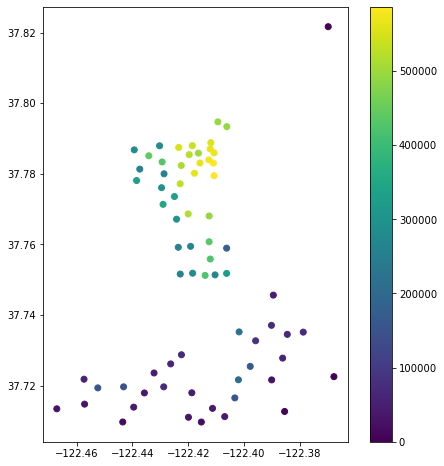

In [26]:
job_sum.plot(figsize = (8,8), column='jobs30', legend = True)